In [1]:
import tensorflow as tf

In [2]:
import os
os.chdir('..')  # Run this only once

In [105]:
from qmatrix import QMatrix
import numpy as np

q = QMatrix()
q.load('qmatrix-fraction')
np.array(q.Q)

Prior None
prefix is now tmp/0-0
prefix is now tmp/0-1


array([[False, False, False,  True, False,  True,  True, False],
       [False, False, False,  True, False, False,  True, False],
       [False, False, False,  True, False, False,  True, False],
       [False,  True,  True, False,  True, False,  True, False],
       [False,  True, False,  True, False, False,  True,  True],
       [False, False, False, False, False, False,  True, False],
       [ True,  True, False, False, False, False,  True, False],
       [False, False, False, False, False, False,  True, False],
       [False,  True, False, False, False, False, False, False],
       [False,  True, False, False,  True, False,  True,  True],
       [False,  True, False, False,  True, False,  True, False],
       [False, False, False, False, False, False,  True,  True],
       [False,  True, False,  True,  True, False,  True, False],
       [False,  True, False, False, False, False,  True, False],
       [ True, False, False, False, False, False,  True, False],
       [False,  True, Fal

In [106]:
#q.Q = [[True] * 8 for _ in range(20)]

In [107]:
q.Q

[[False, False, False, True, False, True, True, False],
 [False, False, False, True, False, False, True, False],
 [False, False, False, True, False, False, True, False],
 [False, True, True, False, True, False, True, False],
 [False, True, False, True, False, False, True, True],
 [False, False, False, False, False, False, True, False],
 [True, True, False, False, False, False, True, False],
 [False, False, False, False, False, False, True, False],
 [False, True, False, False, False, False, False, False],
 [False, True, False, False, True, False, True, True],
 [False, True, False, False, True, False, True, False],
 [False, False, False, False, False, False, True, True],
 [False, True, False, True, True, False, True, False],
 [False, True, False, False, False, False, True, False],
 [True, False, False, False, False, False, True, False],
 [False, True, False, False, False, False, True, False],
 [False, True, False, False, True, False, True, False],
 [False, True, False, False, True, True,

In [108]:
from my_io import Dataset
dataset = Dataset('fraction')

prefix is now tmp/0-0
prefix is now tmp/0-1


In [109]:
from conf import dataset_name, nb_competences_values, STUDENT_FOLD, QUESTION_FOLD
from my_io import IO, Dataset

files = IO()
dataset = Dataset(dataset_name, files)
dataset.load_subset()
print(dataset)

prefix is now tmp/0-0
prefix is now tmp/0-1
[fraction] (394 + 142) x 20, 4x2-fold


In [110]:
train_users = dataset.train_subsets[0]

In [111]:
from sklearn.model_selection import ShuffleSplit

In [112]:
len(dataset.data)

536

In [113]:
triplets = []
for i in range(dataset.nb_students):
    for j in range(dataset.nb_questions):
        triplets.append((i, j, int(dataset.data[i][j])))

In [114]:
triplets

[(0, 0, 0),
 (0, 1, 0),
 (0, 2, 0),
 (0, 3, 1),
 (0, 4, 0),
 (0, 5, 0),
 (0, 6, 1),
 (0, 7, 1),
 (0, 8, 0),
 (0, 9, 1),
 (0, 10, 1),
 (0, 11, 1),
 (0, 12, 0),
 (0, 13, 1),
 (0, 14, 1),
 (0, 15, 1),
 (0, 16, 0),
 (0, 17, 1),
 (0, 18, 1),
 (0, 19, 1),
 (1, 0, 0),
 (1, 1, 1),
 (1, 2, 1),
 (1, 3, 1),
 (1, 4, 0),
 (1, 5, 1),
 (1, 6, 1),
 (1, 7, 1),
 (1, 8, 1),
 (1, 9, 1),
 (1, 10, 1),
 (1, 11, 1),
 (1, 12, 1),
 (1, 13, 1),
 (1, 14, 1),
 (1, 15, 1),
 (1, 16, 1),
 (1, 17, 1),
 (1, 18, 1),
 (1, 19, 1),
 (2, 0, 0),
 (2, 1, 1),
 (2, 2, 1),
 (2, 3, 1),
 (2, 4, 0),
 (2, 5, 1),
 (2, 6, 1),
 (2, 7, 1),
 (2, 8, 0),
 (2, 9, 0),
 (2, 10, 0),
 (2, 11, 0),
 (2, 12, 0),
 (2, 13, 1),
 (2, 14, 1),
 (2, 15, 1),
 (2, 16, 0),
 (2, 17, 0),
 (2, 18, 0),
 (2, 19, 0),
 (3, 0, 1),
 (3, 1, 1),
 (3, 2, 1),
 (3, 3, 1),
 (3, 4, 1),
 (3, 5, 1),
 (3, 6, 0),
 (3, 7, 1),
 (3, 8, 0),
 (3, 9, 1),
 (3, 10, 1),
 (3, 11, 1),
 (3, 12, 0),
 (3, 13, 1),
 (3, 14, 0),
 (3, 15, 1),
 (3, 16, 0),
 (3, 17, 1),
 (3, 18, 0),
 (3, 19, 1),


## Import Movielens data

In [115]:
import csv

'''triplets = []
with open('/Users/jin/Sites/mangaki/data/ratings-ml.csv') as f:
    reader = csv.reader(f)
    for user_id, work_id, rating in reader:
        triplets.append([int(user_id), int(work_id), 1 if float(rating) >= 2.5 else 0])'''

"triplets = []\nwith open('/Users/jin/Sites/mangaki/data/ratings-ml.csv') as f:\n    reader = csv.reader(f)\n    for user_id, work_id, rating in reader:\n        triplets.append([int(user_id), int(work_id), 1 if float(rating) >= 2.5 else 0])"

In [116]:
k_fold = ShuffleSplit(n_splits=5)

In [117]:
for i_train, i_test in k_fold.split(triplets):  # [:1000]
    pass

In [118]:
import numpy as np

i_train = []
i_test = []
for i, triplet in enumerate(triplets):
    user_id = triplet[0]
    if user_id in train_users:
        i_train.append(i)
    else:
        i_test.append(i)
    
train = np.array(triplets)[i_train]
test = np.array(triplets)[i_test]

In [119]:
len(train_users)

394

In [120]:
import numpy as np
#X = tf.constant(np.array(dataset.data).astype(np.float32))

In [121]:
import csv
import random

def get_train_test(data):
    n = len(data)
    m = len(data[0])
    train = []
    test = []
    for i in range(n):
        for j in range(m):
            if random.random() < 0.9:
                train.append((i, j, int(data[i][j])))
            else:
                test.append((i, j, int(data[i][j])))
    return train, test

In [122]:
def base(i, d):
    v = [0] * d
    v[i] = 1
    return v

In [123]:
#train, test = get_train_test(dataset.data)

In [124]:
NB_USERS = 1 + max(max(train[:, 0]), max(test[:, 0]))
NB_WORKS = 1 + max(max(train[:, 1]), max(test[:, 1]))

def make_hot(triplets):
    data = []
    for i, j, v in triplets:
        data.append((base(i, NB_USERS), base(j, NB_WORKS), v))
    random.shuffle(data)
    return data

In [125]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield len(l[i:i + n]), l[i:i + n]

In [126]:
def get_batches(data):
    return list(map(np.array, zip(*data)))

In [127]:
data = make_hot(train)

In [128]:
N = NB_USERS
R = 8
M = NB_WORKS

In [129]:
N, M

(536, 20)

In [130]:
U = tf.Variable(tf.random_normal([N, R]), name='U')
V = tf.Variable(tf.random_normal([R, M]), name='V')
bias = tf.Variable(tf.random_normal([M, 1]), name='bias')

In [131]:
BATCH_SIZE = 5000
E = tf.placeholder(tf.float32, shape=(None, N))
F = tf.placeholder(tf.float32, shape=(None, M))
T = tf.placeholder(tf.float32, shape=None)

In [132]:
pred_without_bias = tf.reduce_sum(tf.matmul(E, U) * tf.matmul(F, tf.multiply(tf.transpose(tf.abs(V)), q.Q)), axis=1)
pred = pred_without_bias + tf.reduce_sum(tf.matmul(F, bias), axis=1)

In [133]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=T, logits=pred))
regularized_loss = (loss + 0.01 * tf.reduce_mean(tf.square(U))
                         + 0.01 * tf.reduce_mean(tf.abs(V))
                         + 0.01 * tf.reduce_mean(tf.square(bias)))

In [134]:
optimizer = tf.train.AdamOptimizer(0.01)
train_step = optimizer.minimize(regularized_loss, var_list=[U, V, bias])
#train_V_step = optimizer.minimize(negative_log_likelihood, var_list=[V])

In [135]:
init_op = tf.global_variables_initializer()

In [136]:
sess = tf.InteractiveSession()
sess.run(init_op)

In [137]:
test_data = make_hot(test)

In [147]:
for iteration in range(20):
    for size, chunk in chunks(data, BATCH_SIZE):
        if size < BATCH_SIZE:
            print('train', sess.run(loss, feed_dict={E: eb, F: fb, T: vb}))
        eb, fb, vb = get_batches(chunk)
        sess.run(train_step, feed_dict={E: eb, F: fb, T: vb})
        
    if iteration % 1 == 0:
        eb, fb, vb = get_batches(test_data)
        print(iteration, sess.run(loss, feed_dict={E: eb, F: fb, T: vb}))        

train 0.368967
0 0.726438
train 0.365148
1 0.725491
train 0.361397
2 0.724566
train 0.357715
3 0.723663
train 0.354098
4 0.72278
train 0.350545
5 0.721917
train 0.347055
6 0.721074
train 0.343626
7 0.720251
train 0.340257
8 0.719446
train 0.336946
9 0.71866
train 0.333693
10 0.717892
train 0.330495
11 0.717141
train 0.327352
12 0.716408
train 0.324263
13 0.715692
train 0.321226
14 0.714991
train 0.31824
15 0.714307
train 0.315304
16 0.713639
train 0.312418
17 0.712986
train 0.30958
18 0.712348
train 0.30679
19 0.711725


La bonne nouvelle, c'est qu'on obtient une log-likelihood de -3606 en 20 itérations alors que je viens de check, le package R converge au bout de 210 itérations vers une log-likelihood de -4454.

Reste à savoir si ça généralise bien. (Le package R lui suppose un prior bayésien sur les compétences des gens.)

0.00 0.00 0.00 1.47 0.00 1.01 1.34 0.00 
0.00 0.00 0.00 2.13 0.00 0.00 1.93 0.00 
0.00 0.00 0.00 1.79 0.00 0.00 1.70 0.00 
0.00 0.79 1.82 0.00 0.45 0.00 0.87 0.00 
0.00 0.44 0.00 0.55 0.00 0.00 0.59 1.80 
0.00 0.00 0.00 0.00 0.00 0.00 1.31 0.00 
0.80 0.95 0.00 0.00 0.00 0.00 1.24 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.88 0.00 
0.00 1.20 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.60 0.00 0.00 1.13 0.00 1.38 1.25 
0.00 1.39 0.00 0.00 1.08 0.00 1.26 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 1.17 1.13 
0.00 0.32 0.00 1.08 1.12 0.00 1.04 0.00 
0.00 2.62 0.00 0.00 0.00 0.00 1.70 0.00 
1.27 0.00 0.00 0.00 0.00 0.00 1.38 0.00 
0.00 1.57 0.00 0.00 0.00 0.00 1.04 0.00 
0.00 1.46 0.00 0.00 1.35 0.00 1.12 0.00 
0.00 0.90 0.00 0.00 0.53 2.00 1.06 0.00 
1.84 0.42 0.38 0.00 1.20 0.00 0.75 0.00 
0.00 0.85 0.69 0.00 1.44 0.00 1.04 0.00 


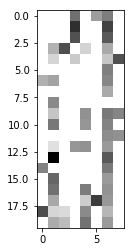

In [150]:
import matplotlib.pyplot as plt

def display(matrix):
    for line in matrix:
        for item in line:
            print('%.2f' % item, end=' ')
        print()

a = np.round(np.abs(V.eval().T) * q.Q, 2)
plt.imshow(a, cmap='binary')
display(a)
plt.show()

In [141]:
U.eval().shape

(536, 8)

In [142]:
np.round(V.eval().T)

array([[ 0., -0.,  0., -1., -0.,  0., -1., -0.],
       [ 1.,  0., -0., -1.,  0., -0., -2.,  0.],
       [ 0., -0.,  0.,  1.,  1.,  0., -1., -0.],
       [-0., -1.,  1.,  0., -0., -0.,  1.,  0.],
       [ 1.,  1.,  0., -1.,  0., -0.,  1.,  1.],
       [-1., -0., -0.,  1., -0., -0., -1., -0.],
       [-0.,  1., -0.,  0., -0.,  0., -1.,  0.],
       [-0., -0., -0., -0.,  0.,  0., -1.,  0.],
       [ 0.,  1., -0., -0., -0.,  0.,  0., -0.],
       [-0.,  0., -0., -1.,  1., -0.,  1., -1.],
       [-0., -1.,  0., -0.,  0., -0.,  1.,  1.],
       [-0., -0., -1., -0.,  0.,  0., -1., -1.],
       [ 0.,  0., -0., -1., -1.,  0.,  1.,  0.],
       [-1.,  1., -0., -0., -2.,  0., -1.,  0.],
       [-0., -0., -0., -0.,  0., -0., -1., -1.],
       [ 0.,  1., -0.,  0.,  0., -0.,  1.,  0.],
       [ 0.,  1.,  1.,  0., -0., -0.,  1., -1.],
       [ 0., -1., -0., -0., -0., -1.,  1., -0.],
       [-1.,  1., -0.,  0.,  0.,  1.,  1., -1.],
       [ 0., -0., -1.,  0.,  1., -0.,  1., -1.]], dtype=float32)

In [148]:
from collections import namedtuple

GenMA = namedtuple('GenMA', 'U V bias')

backup = GenMA(
    U=U.eval(),
    V=np.abs(V.eval().T * q.Q),
    bias=bias.eval()[:, 0]
)
with open('genma.npy', 'wb') as f:
    np.save(f, backup)

In [149]:
backup.V

array([[ 0.        ,  0.        ,  0.        ,  1.47437942,  0.        ,
         1.00702596,  1.33853137,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  2.13279986,  0.        ,
         0.        ,  1.92916107,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.78522968,  0.        ,
         0.        ,  1.70294607,  0.        ],
       [ 0.        ,  0.78895378,  1.81871891,  0.        ,  0.44605637,
         0.        ,  0.87472665,  0.        ],
       [ 0.        ,  0.43935743,  0.        ,  0.55451924,  0.        ,
         0.        ,  0.58599985,  1.79987776],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.31096041,  0.        ],
       [ 0.8003056 ,  0.9509303 ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.24056518,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.87990534,  0.        ],
       [ 0.        ,  1.20180523